<a href="https://colab.research.google.com/github/POde97/Cell-IDpy/blob/main/CellIDExample_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install Dependencies**

In [ ]:
!pip install -q scanpy
!pip install -q mapply
!git clone https://github.com/POde97/Cell-IDpy.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 9.8 MB/s eta 0:00:00
Cloning into 'Cell-IDpy'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% 

In [ ]:
cd Cell-IDpy

/content/Cell-IDpy


In [ ]:
from CellID import*
from HyperG import* 
from mcaplot import*
from ProteinCoding import*

#**Download data and reference gene list**

- scRna-seq data of https://www.cell.com/cell-systems/fulltext/S2405-4712(16)30266-6?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2405471216302666%3Fshowall%3Dtrue

- reference gene lsit from https://panglaodb.se/


In [ ]:
url="https://panglaodb.se/markers/PanglaoDB_markers_27_Mar_2020.tsv.gz"
c=pd.read_csv(url, sep='\t', header=0)

c = c[c["species"].isin(["Hs","Mm Hs"])]
c = c[c["organ"]=="Pancreas"]
c = pd.DataFrame(c.groupby('cell type')['official gene symbol'].apply(list))
c.columns = ["signature"]


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E' -O "Baron.h5ad"

--2023-03-26 14:25:14--  https://docs.google.com/uc?export=download&id=10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E
Resolving docs.google.com (docs.google.com)... 173.194.218.113, 173.194.218.101, 173.194.218.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/045r6u3jmgevkpku58bss9im8qhios0r/1679840700000/15472246493323528491/*/10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E?e=download&uuid=c50ffca4-11dc-459b-b25e-f03a4138f64f [following]
--2023-03-26 14:25:19--  https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/045r6u3jmgevkpku58bss9im8qhios0r/1679840700000/15472246493323528491/*/10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E?e=download&uuid=c50ffca4-11dc-459b-b25e-f03a4138f64f
Resolving doc-0k-8c-docs.googleusercontent.com (doc-0k-8c-docs.googleusercontent.com)... 172.217.203.132, 2607:

#**Load data and perform CellID labelling using reference gene list**

- For an in depth explanation of Cell-ID inner working see: https://www.nature.com/articles/s41587-021-00896-6

In brief data are loaded in AnnData object (data structure of scanpy). Only protein coding genes are retained (not compulsory but improve prediction). Further CellID() class generate CellID perform Multiple correspondence analysis and calculate per cell gene signature. Finally Hypergeom() class labels cells by using an hypergeometric test. 

In [ ]:
adata = sc.read("Baron.h5ad")
adata = adata[:,adata.var_names.isin(HgProteinCoding())]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_normalization.py:170: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


In [ ]:
cID = CellID(adata)

Computing Fuzzy Matrix
Computing SVD
Computing coordinates
Computing Cell-Genes Distances
Build signature with TOP 200 closest genes
Storing MCA in adata object


In [ ]:
HGT = Hypergeom(cID.ad,c)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score
adata1 = cID.ad[cID.ad.obs["gs_prediction"]!="unassigned"]
accuracy_score(list(adata1.obs["cell.type"]), list(adata1.obs["gs_prediction"]))

0.9580794894110821

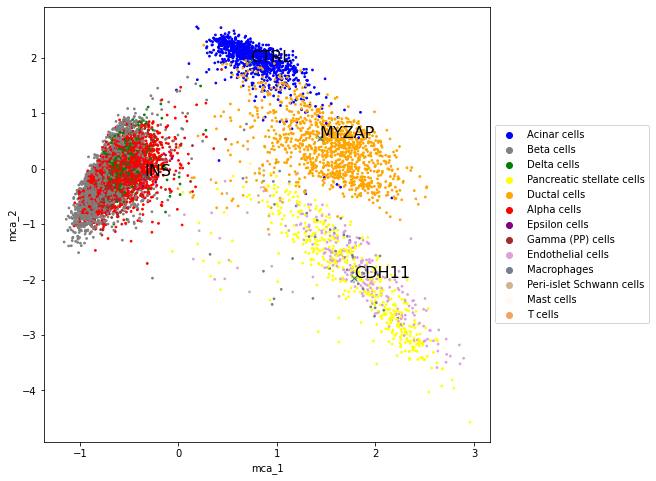

In [ ]:
MCAplot(cID,"cell.type",genep = ["CTRL", "INS", "MYZAP", "CDH11"])